In [68]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import matplotlib.cm as cm
from functools import reduce
from operator import mul
from scipy.stats import mstats

In [83]:
imgPaths = glob.glob("data/level6jpg/*.jpg")
groundTruth = pd.read_csv("data/groundTruth.csv")
groundTruth.head()

CaseNo  HeR2 SCORE  \
0       1           0   
1       4           2   
2       6           2   
3       9           3   
4      11           3   

   PERCENTAGE CELLS WITH COMPLETE MEMBRANE STAINING IRRESPECTIVE OF INTENSITY  
0                                                  0                           
1                                                 60                           
2                                                 40                           
3                                                 70                           
4                                                 90

In [86]:
import re 
from itertools import compress
heBool = map(lambda imgPath: len(re.findall(r"her2",imgPath.lower())) == 0,imgPaths)
he = list(compress(imgPaths,heBool))
her2Bool = [not bool for bool in heBool]
her2 = list(compress(imgPaths,her2Bool))

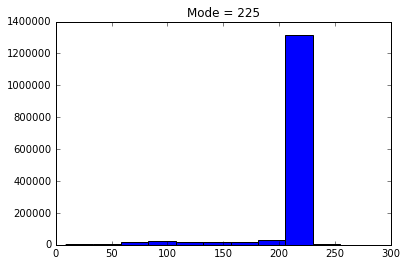

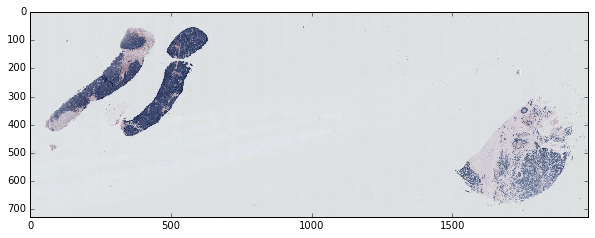

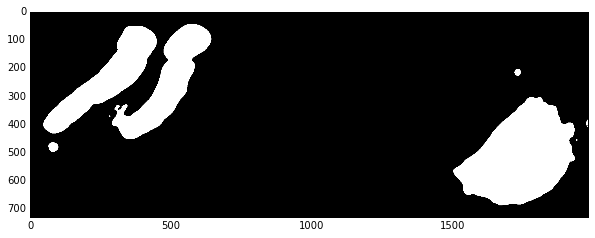

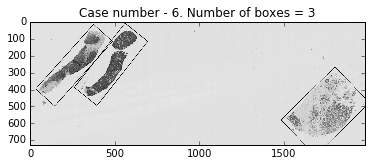

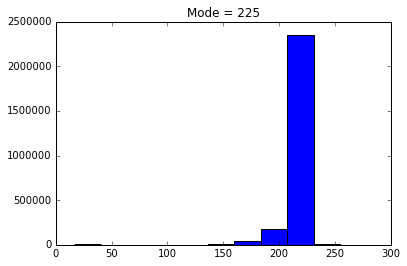

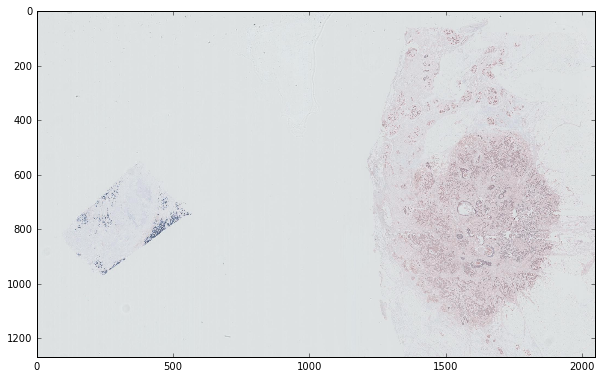

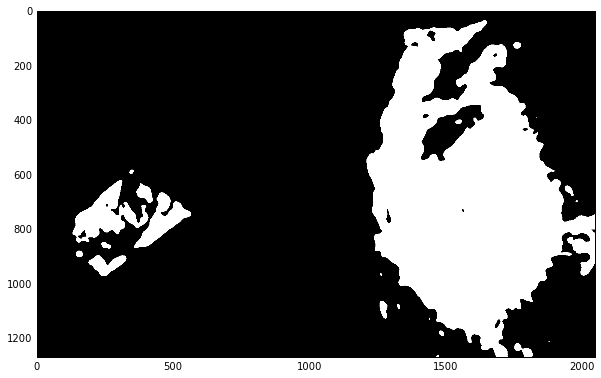

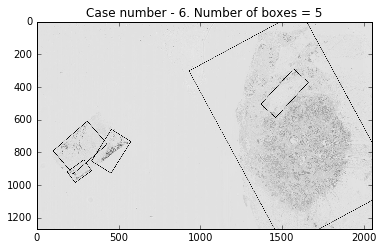

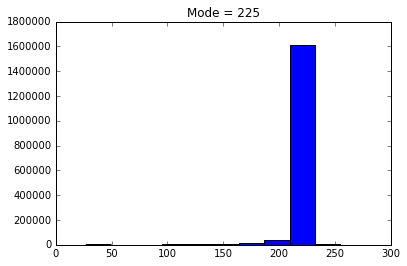

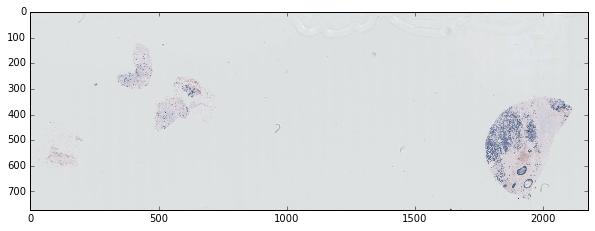

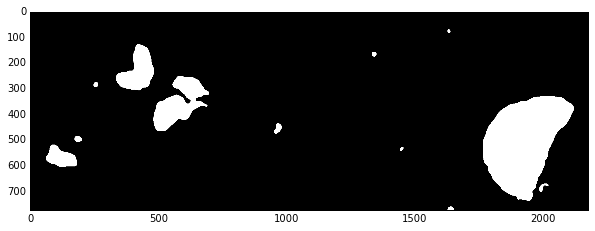

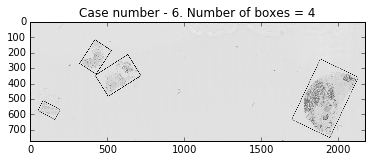

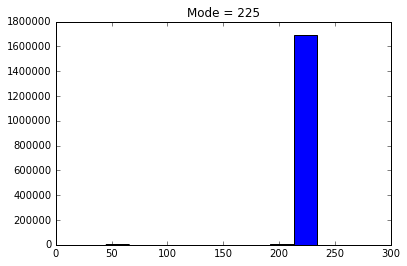

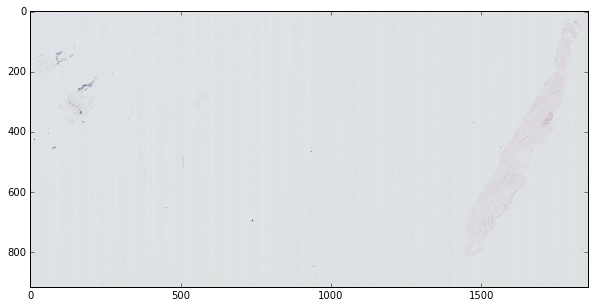

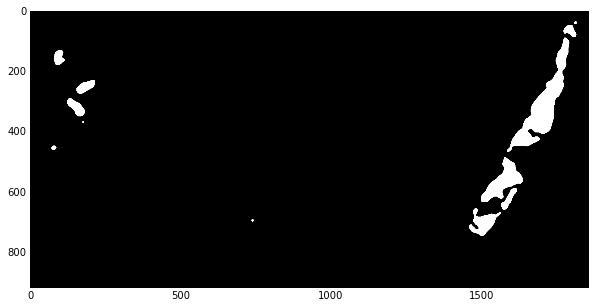

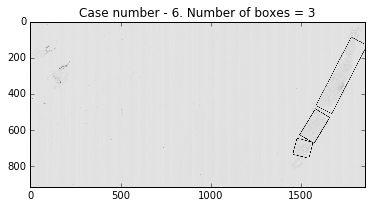

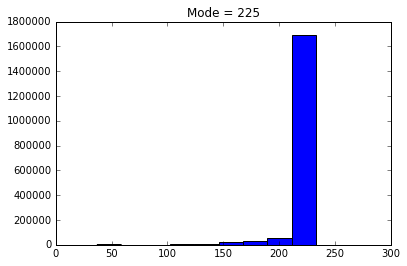

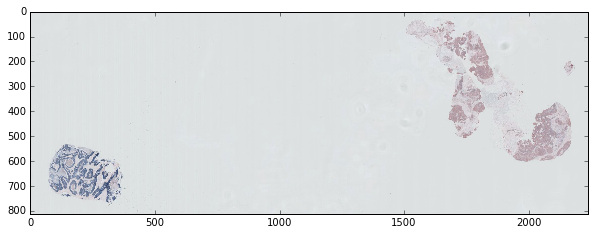

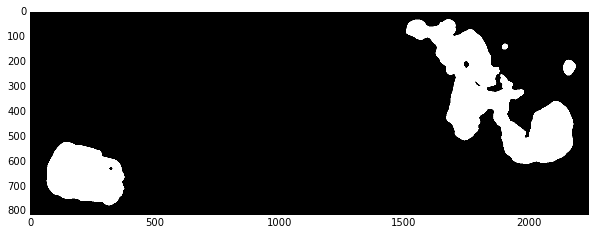

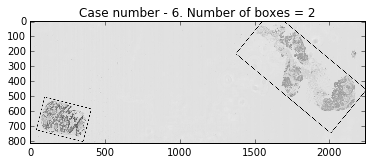

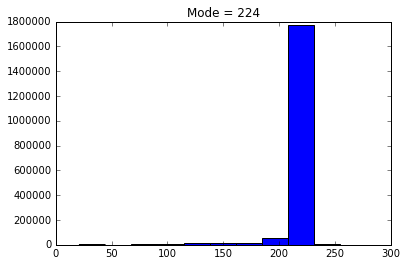

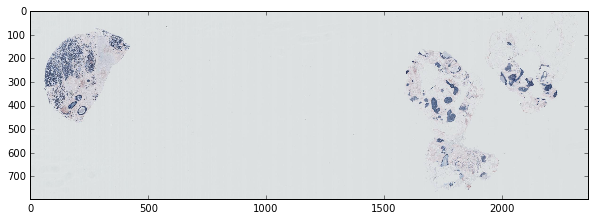

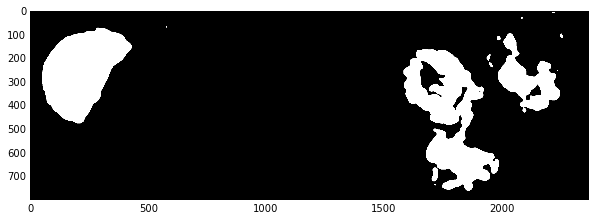

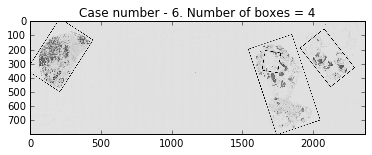

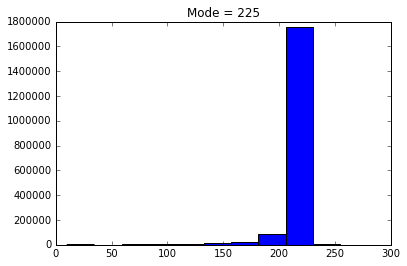

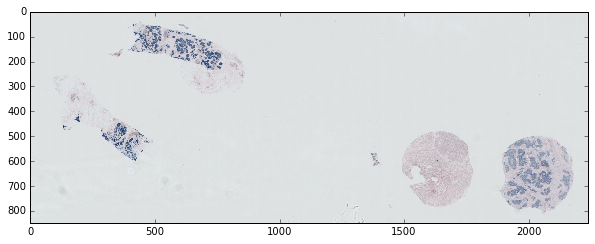

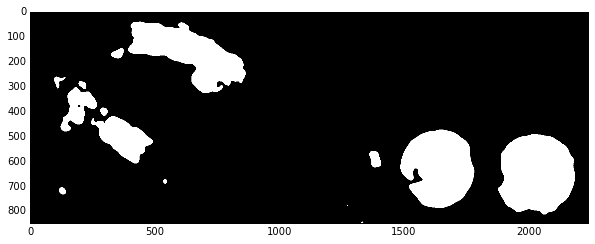

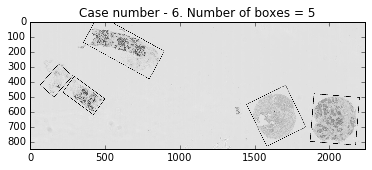

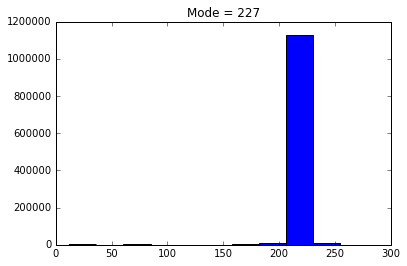

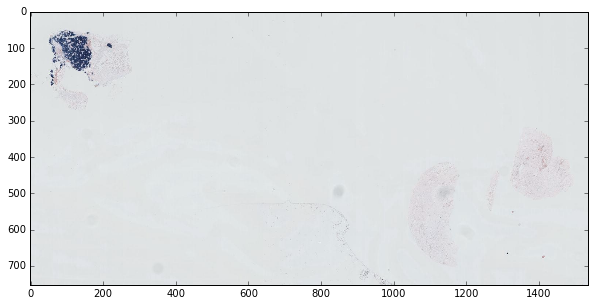

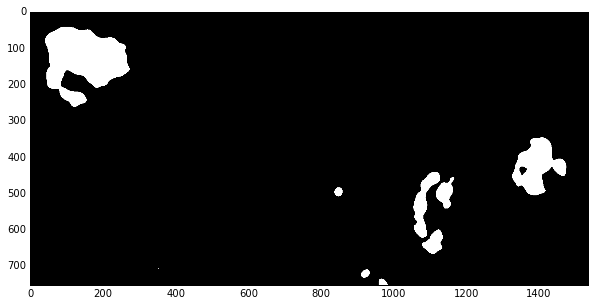

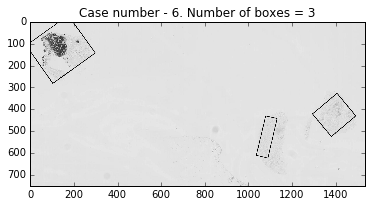

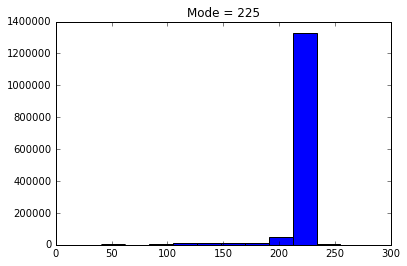

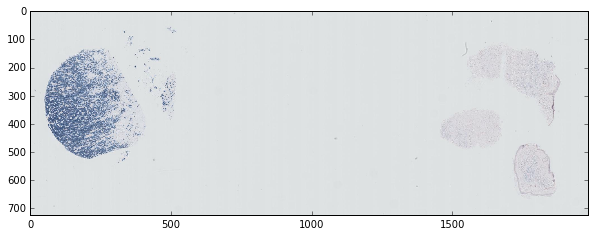

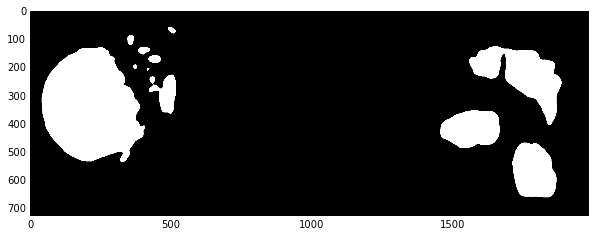

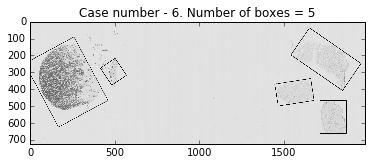

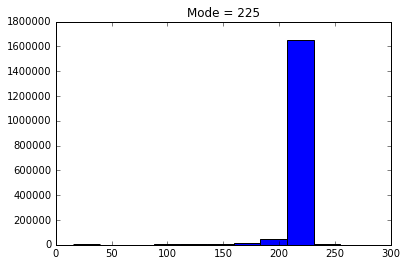

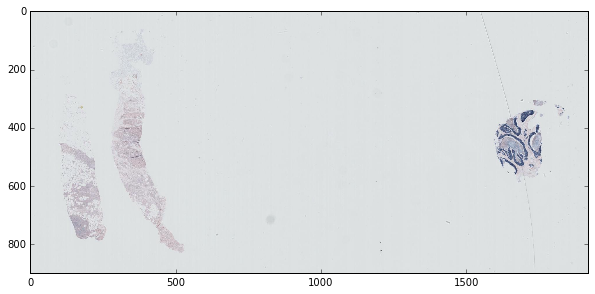

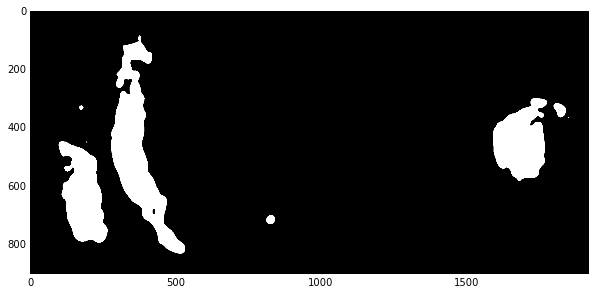

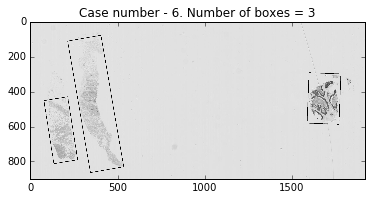

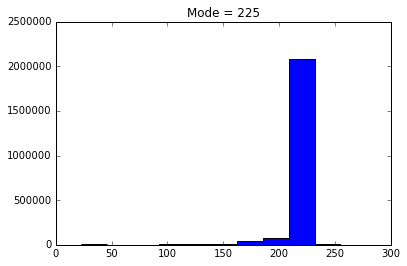

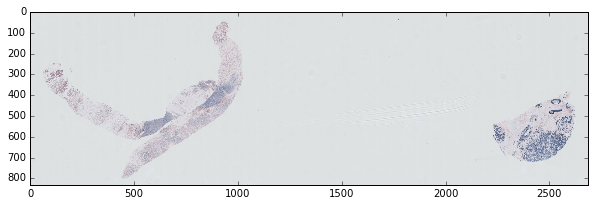

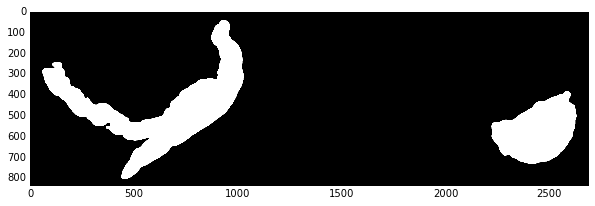

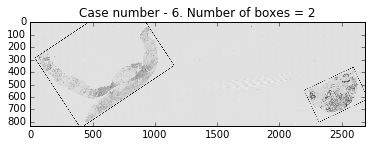

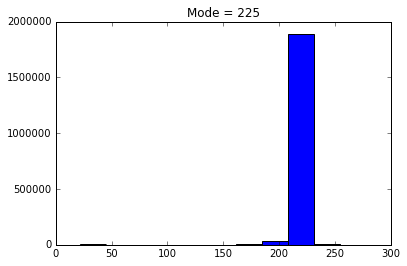

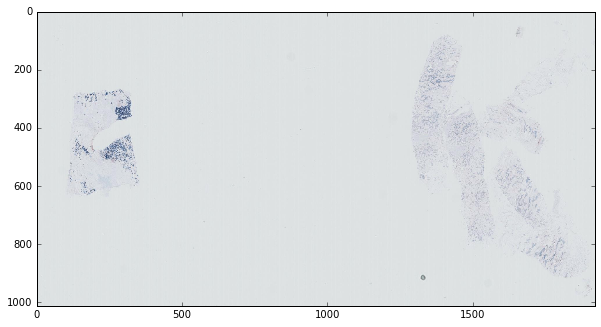

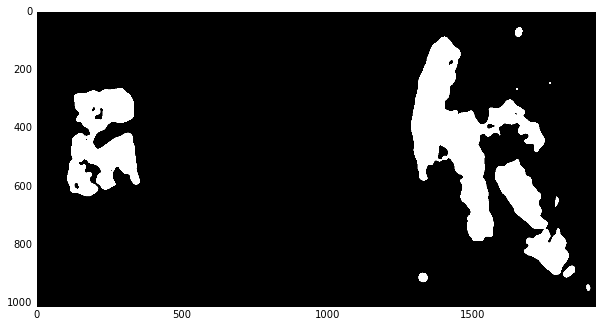

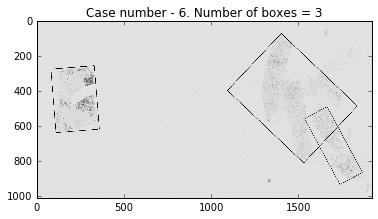

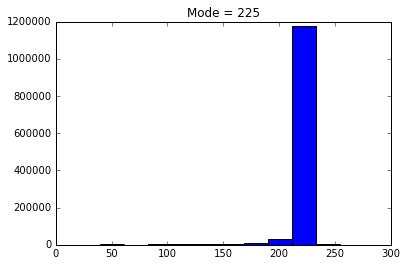

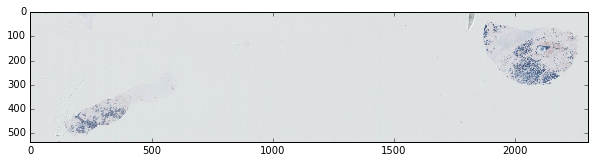

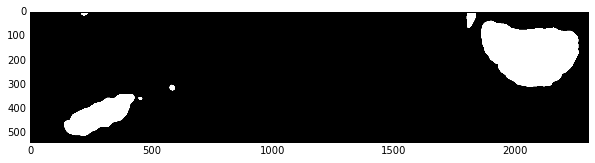

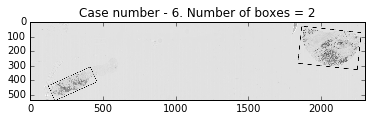

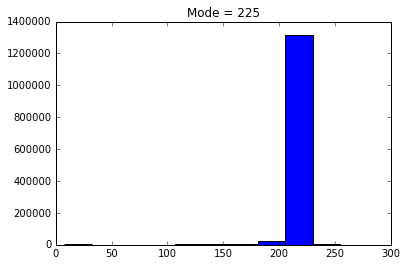

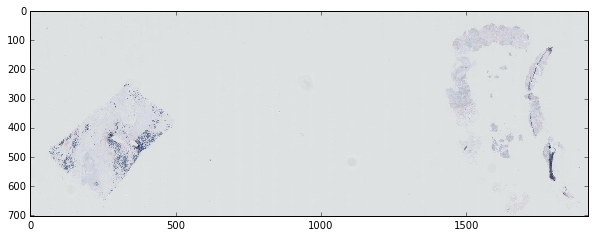

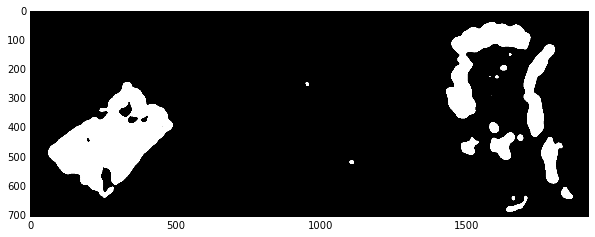

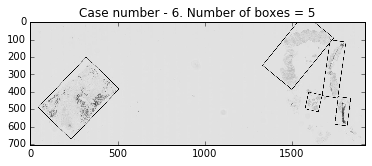

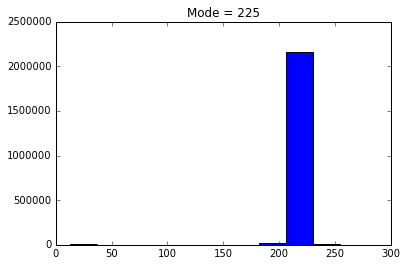

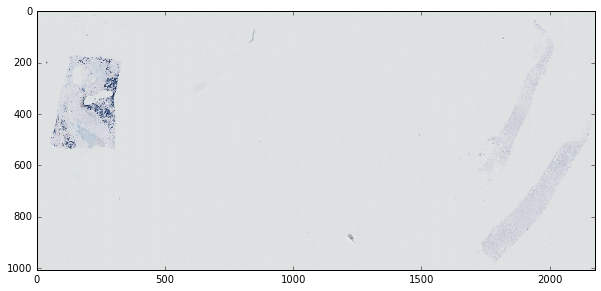

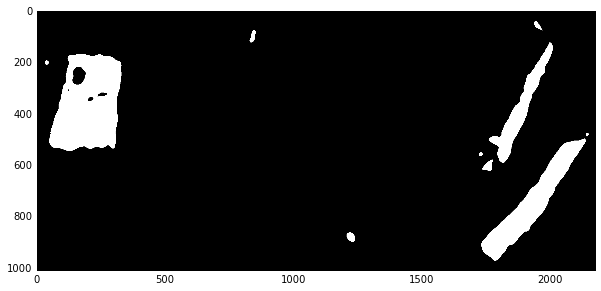

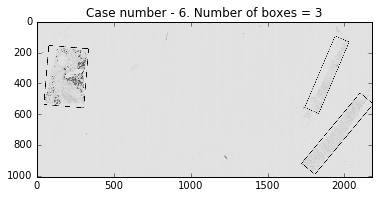

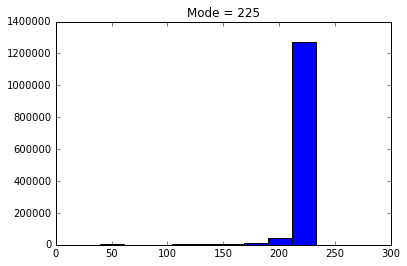

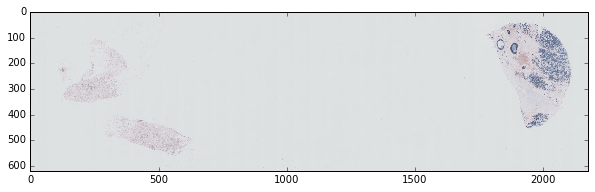

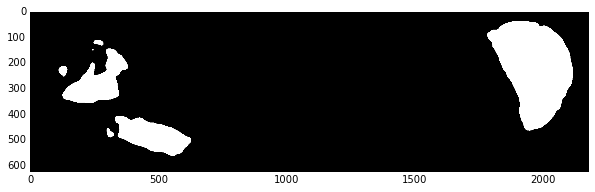

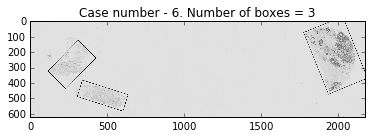

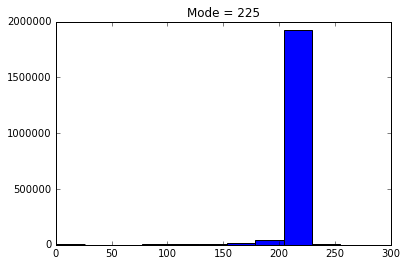

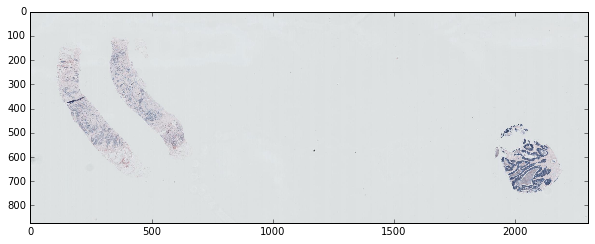

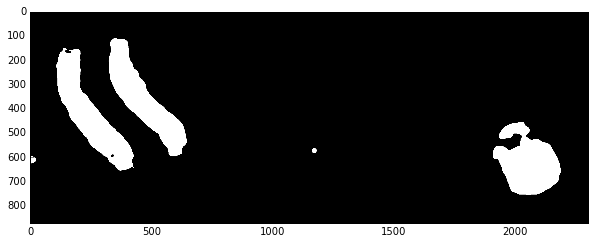

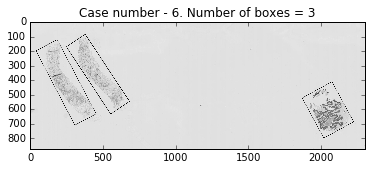

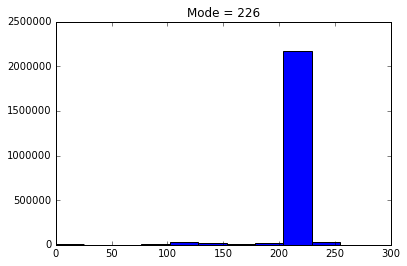

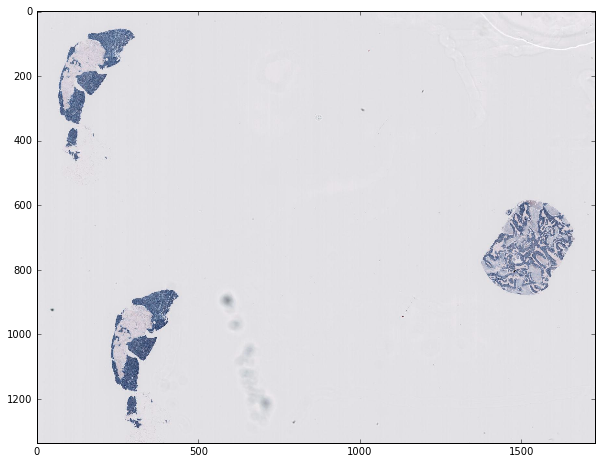

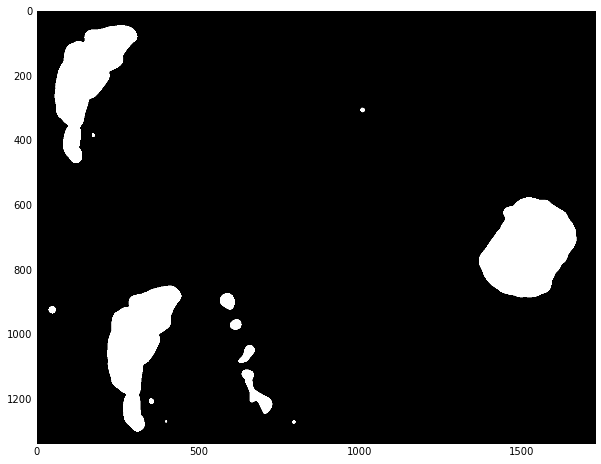

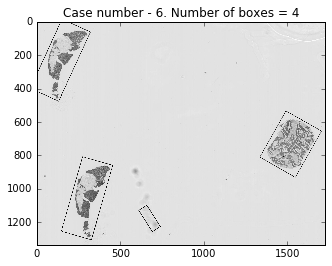

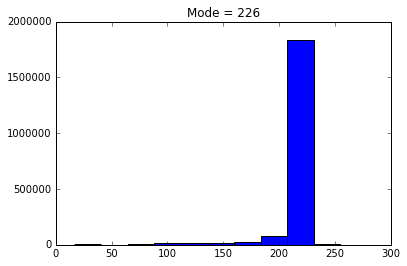

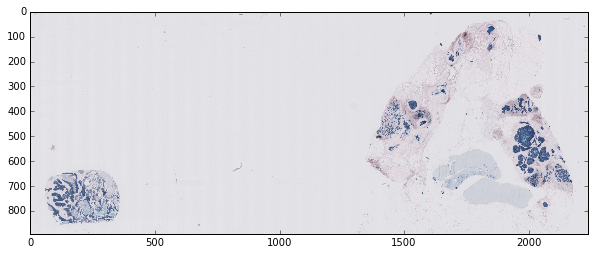

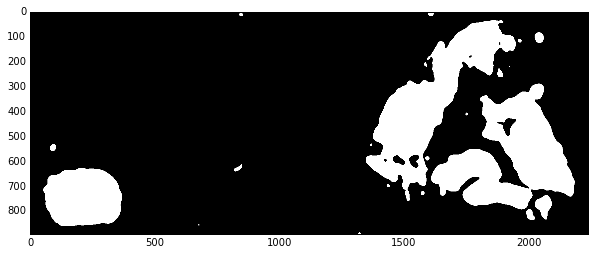

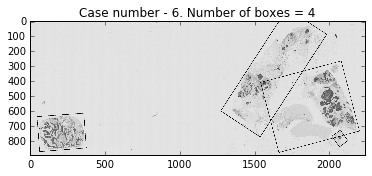

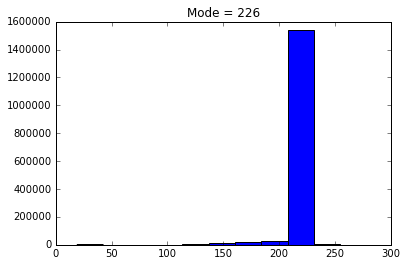

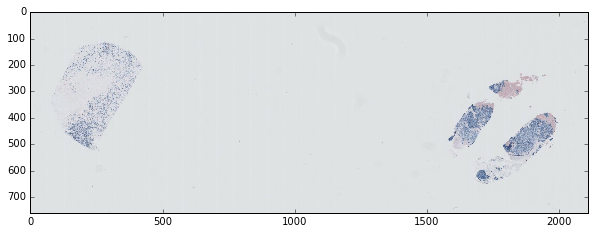

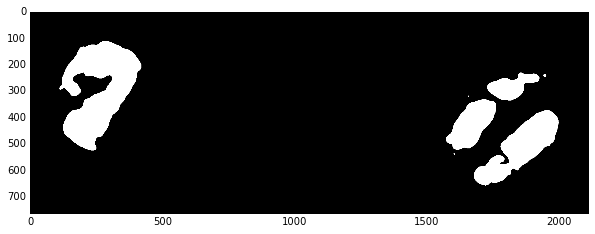

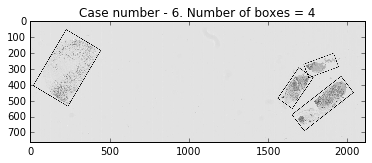

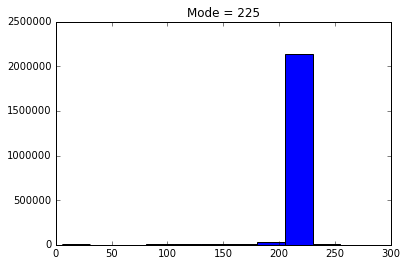

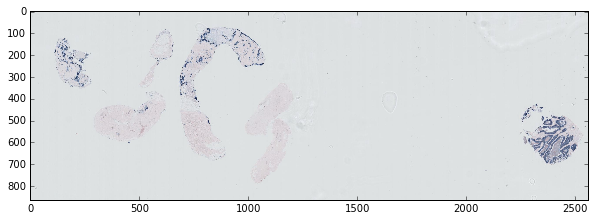

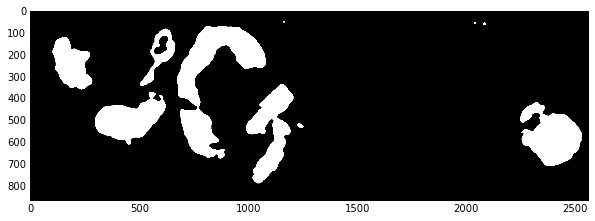

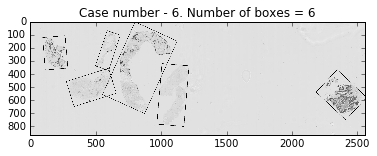

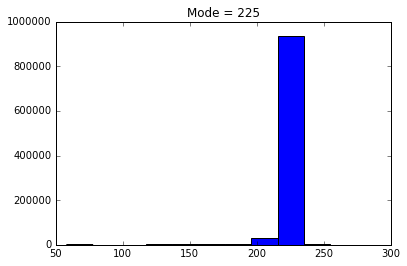

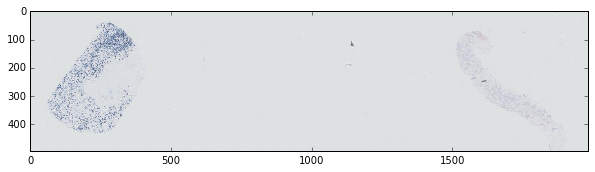

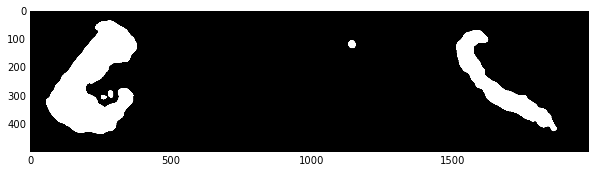

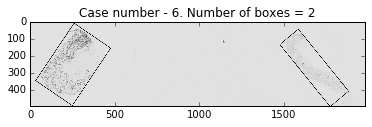

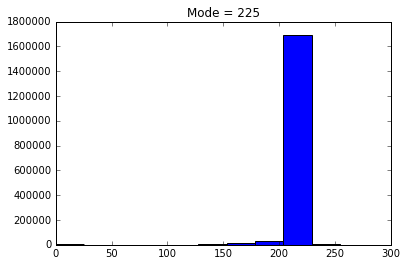

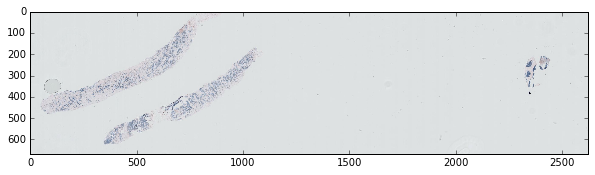

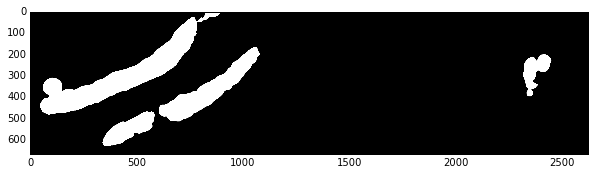

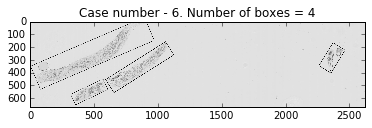

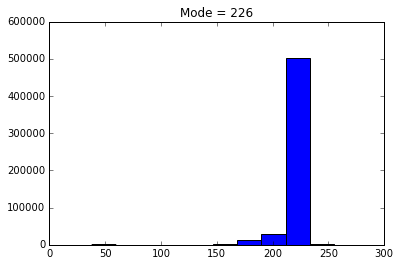

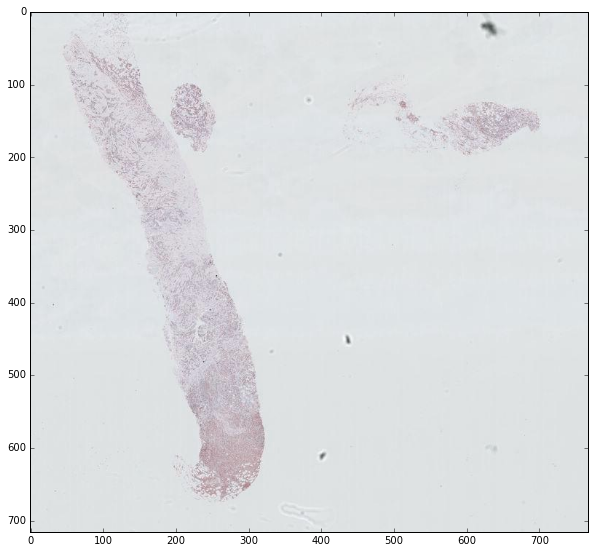

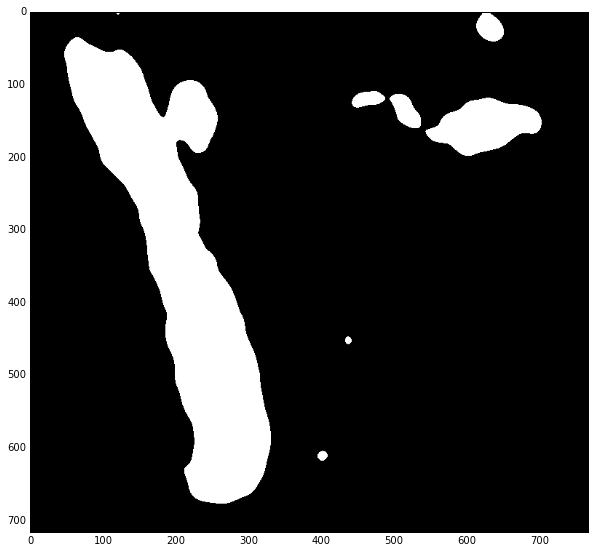

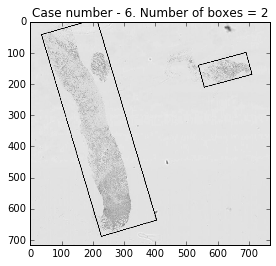

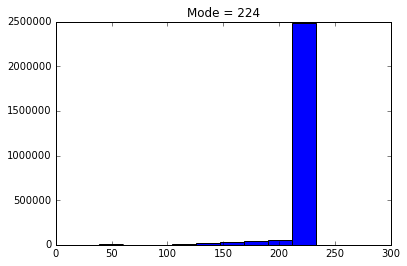

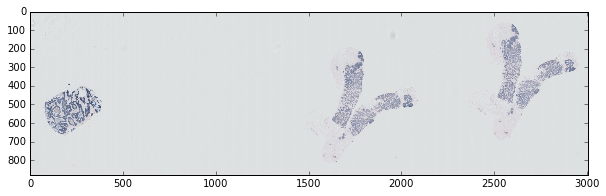

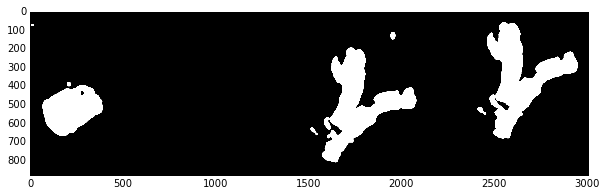

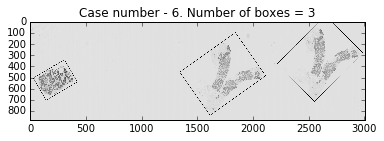

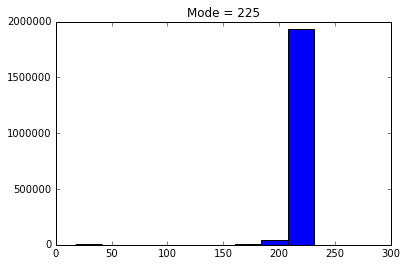

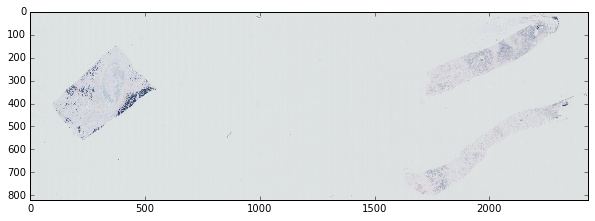

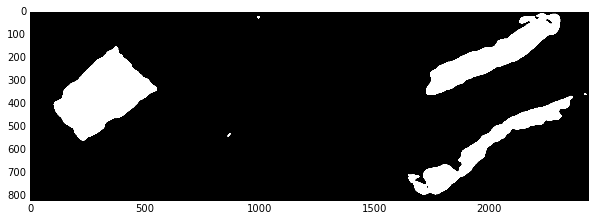

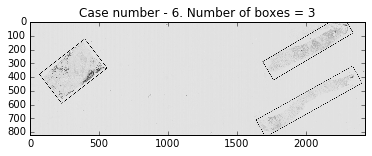

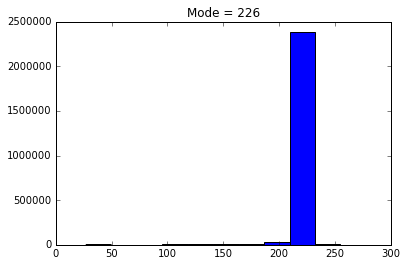

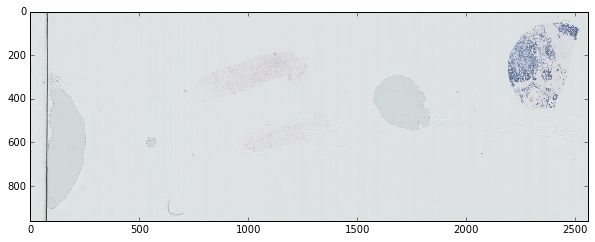

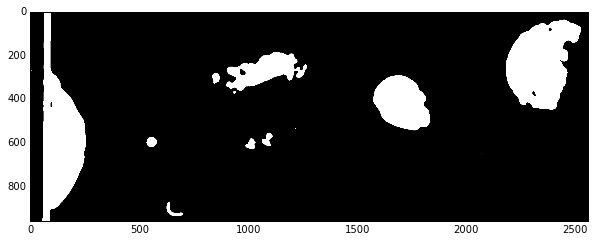

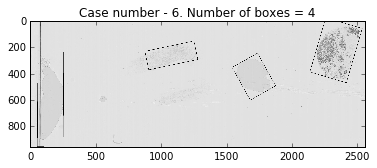

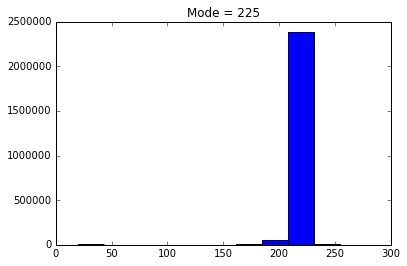

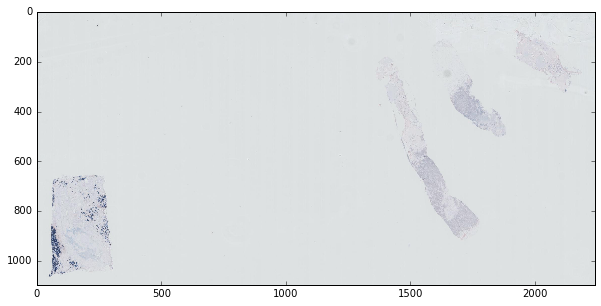

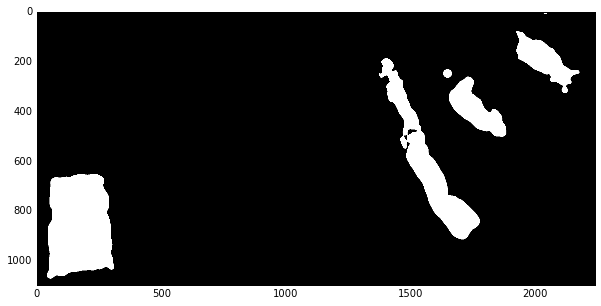

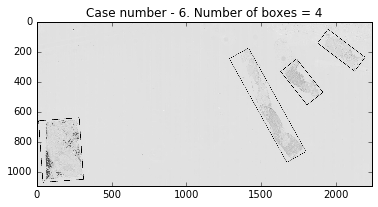

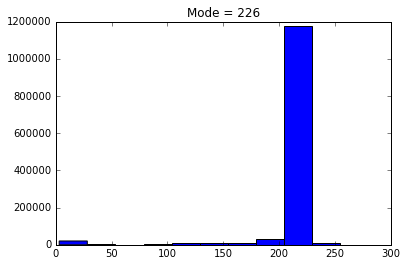

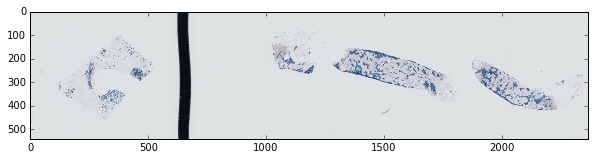

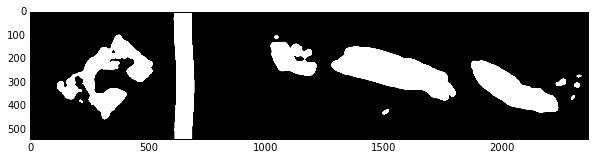

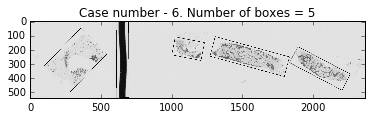

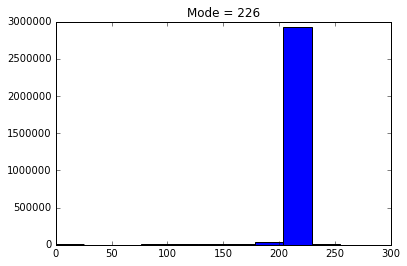

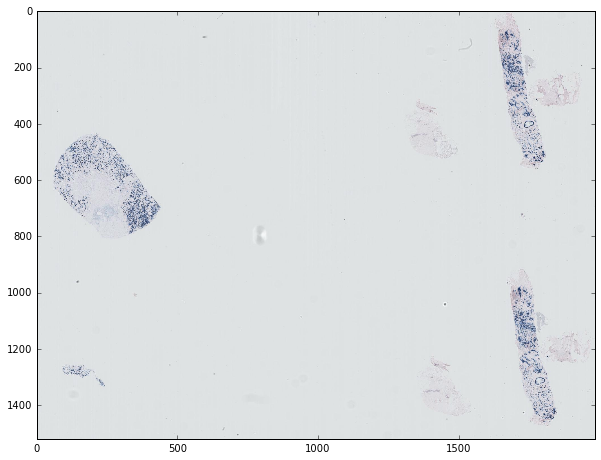

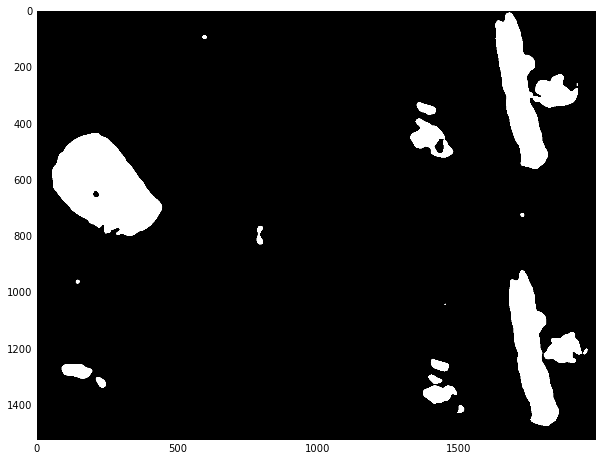

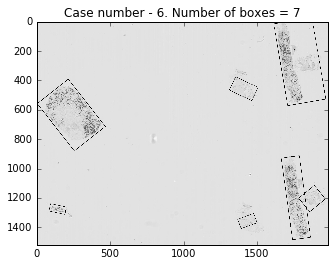

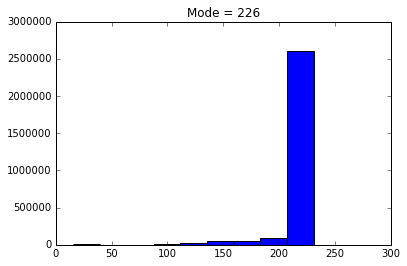

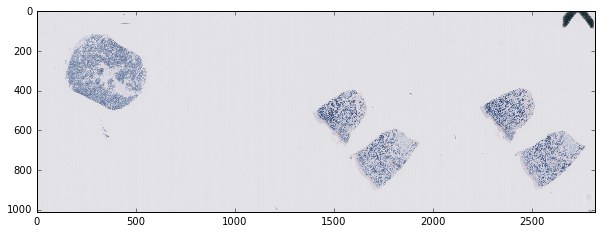

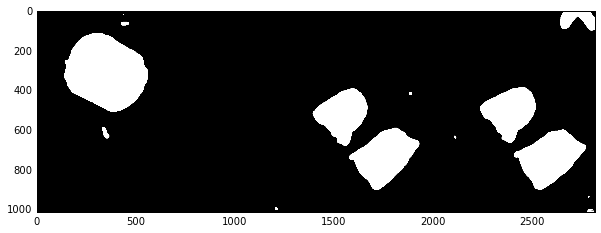

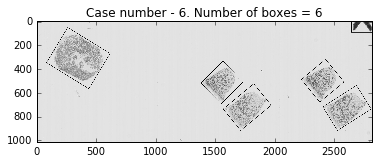

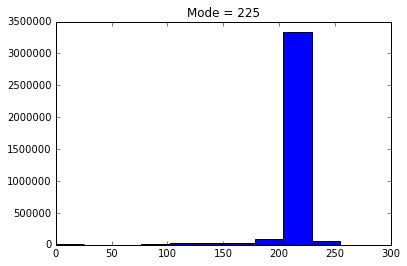

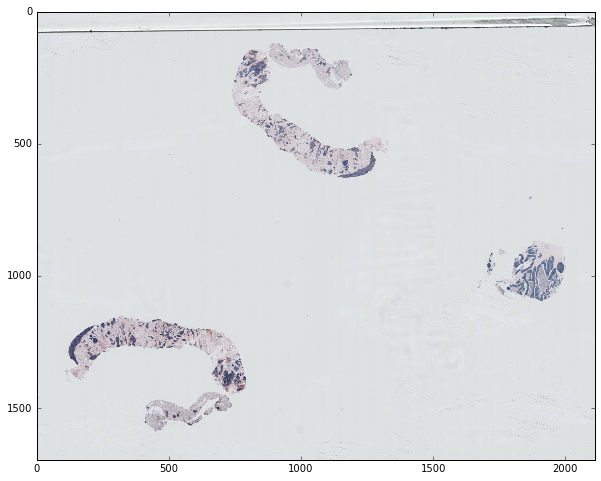

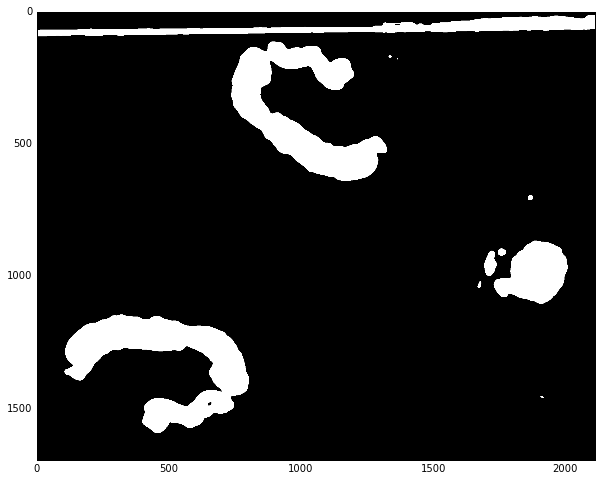

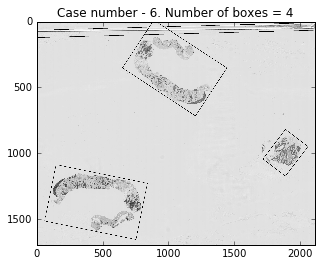

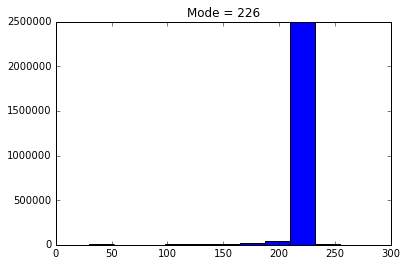

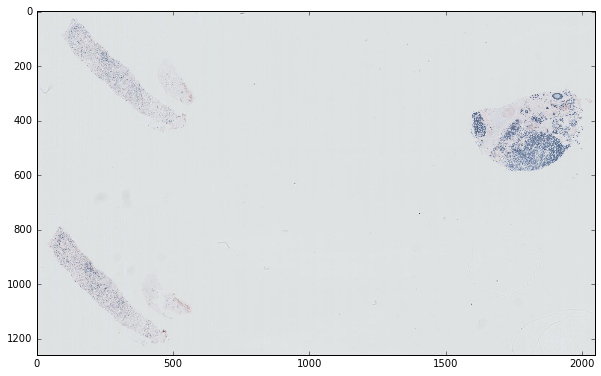

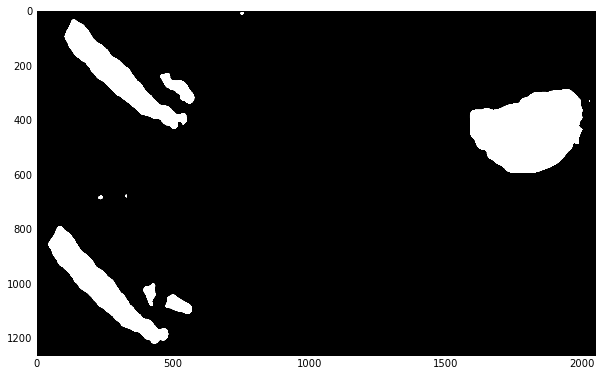

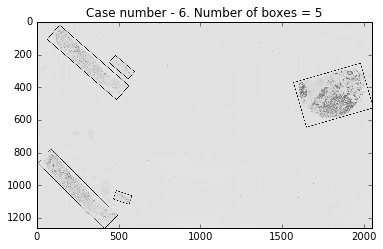

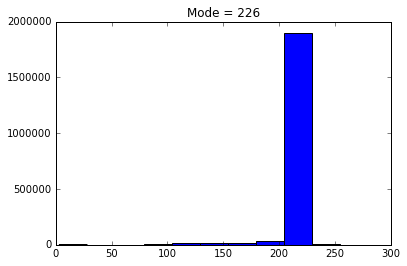

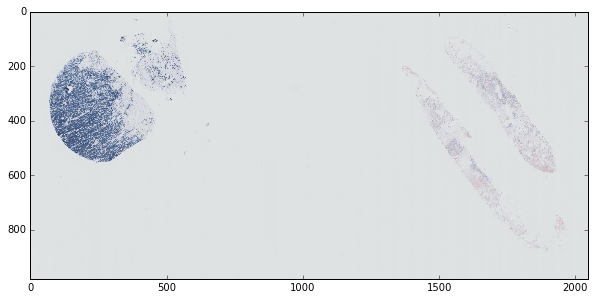

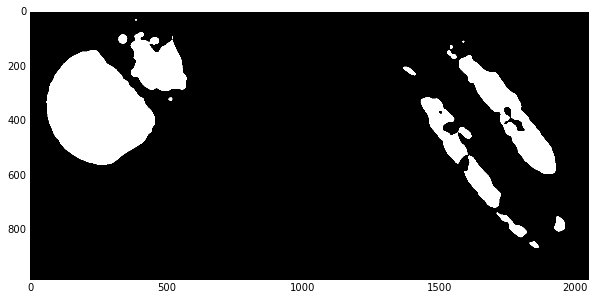

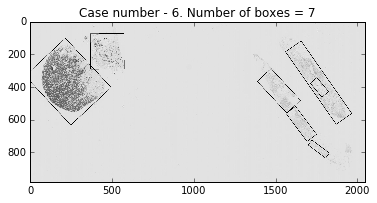

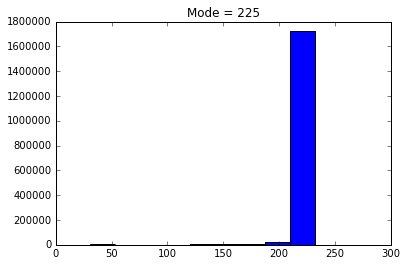

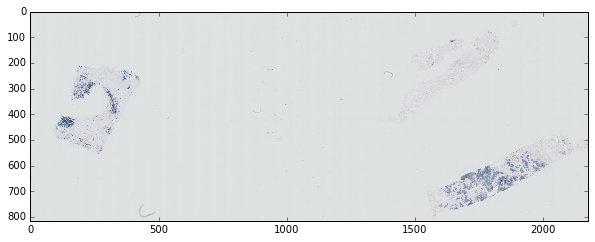

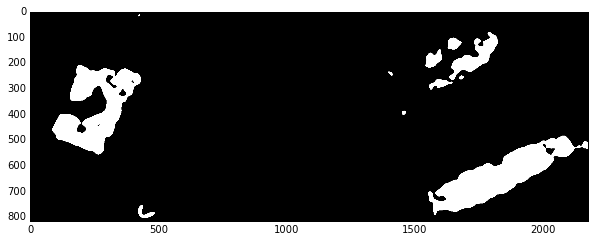

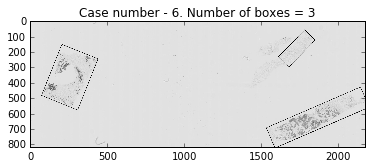

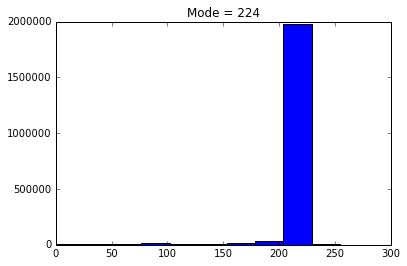

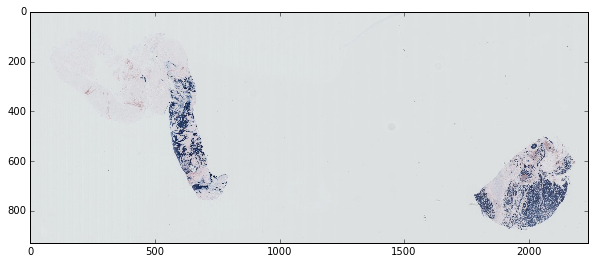

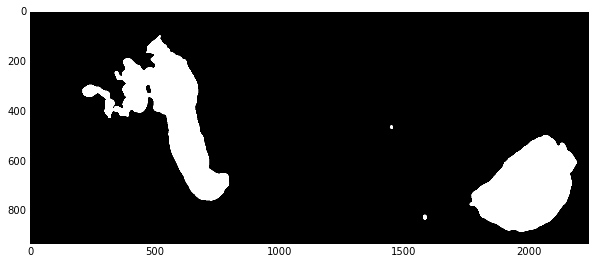

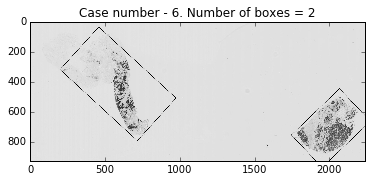

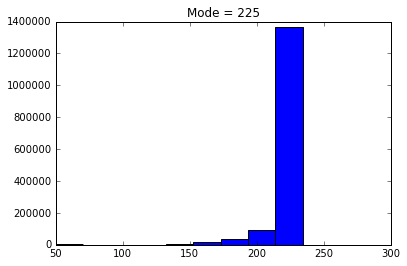

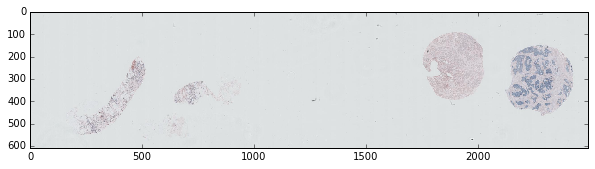

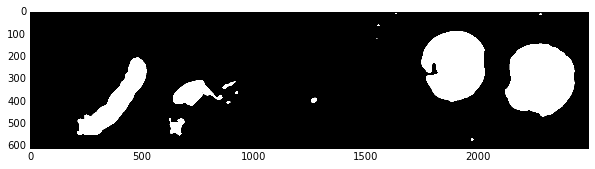

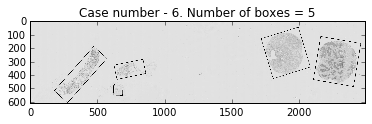

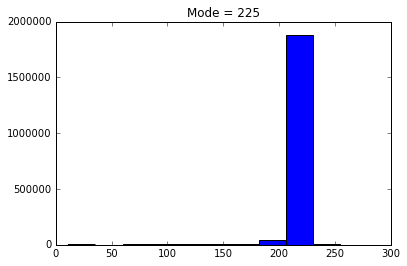

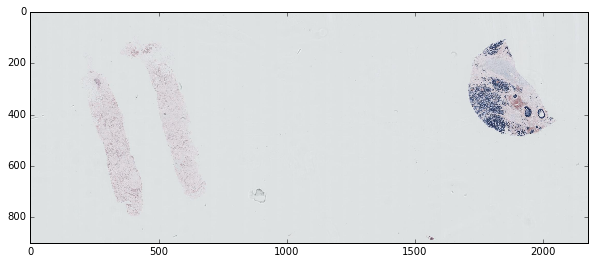

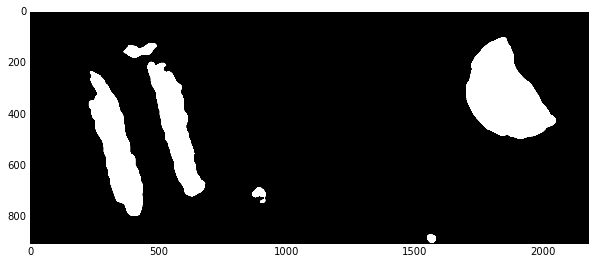

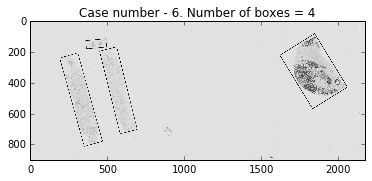

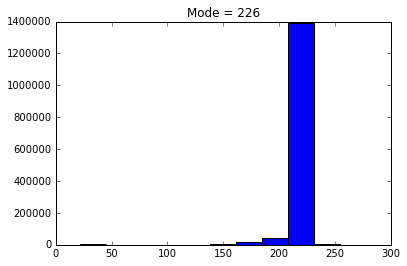

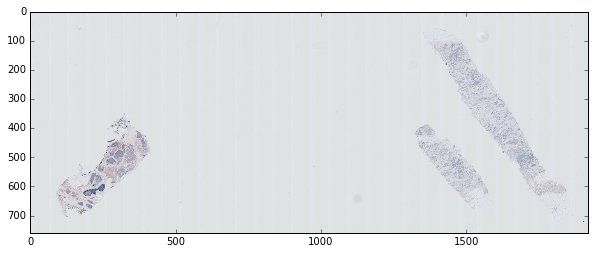

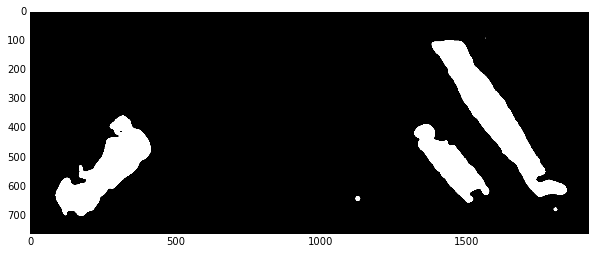

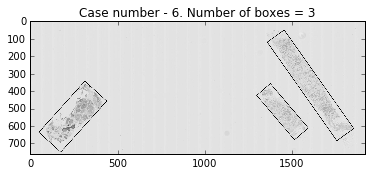

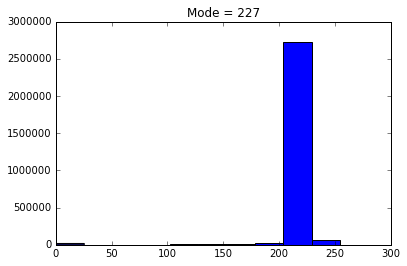

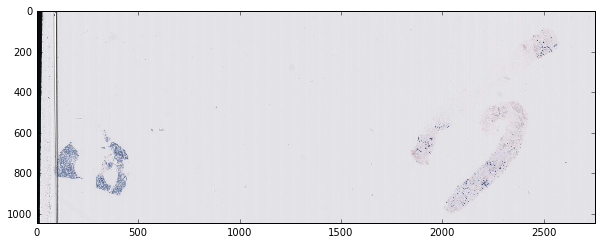

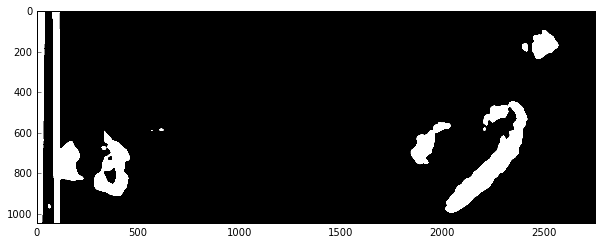

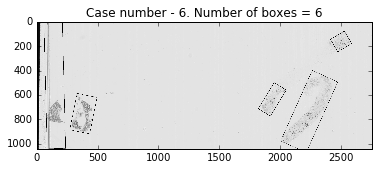

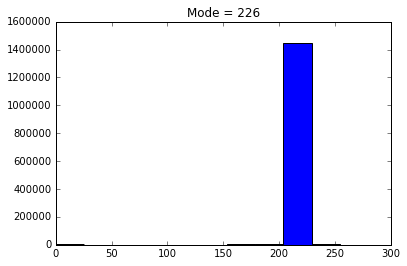

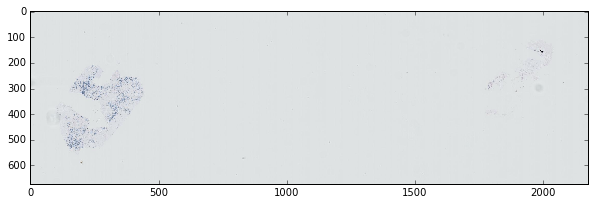

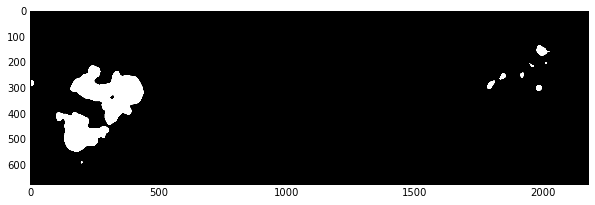

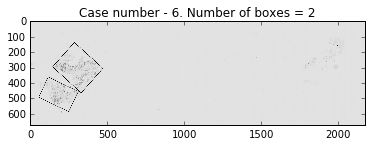

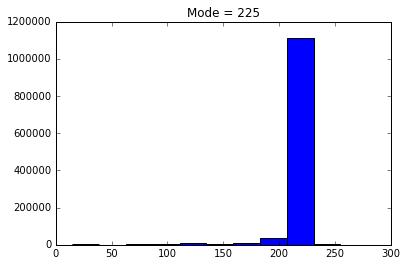

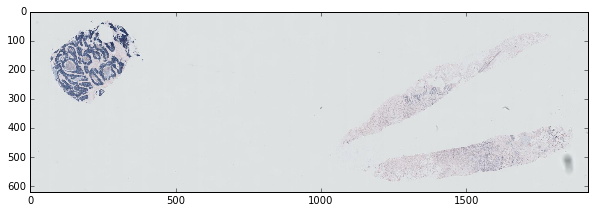

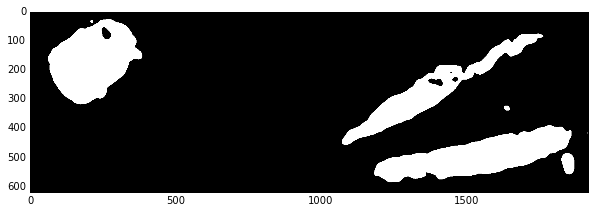

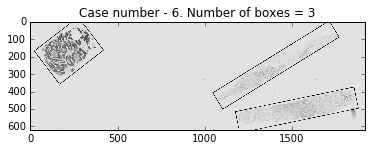

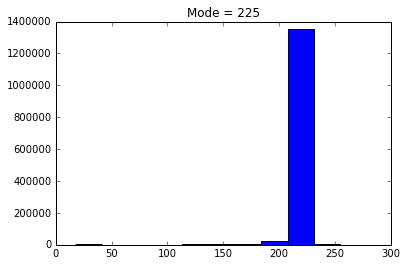

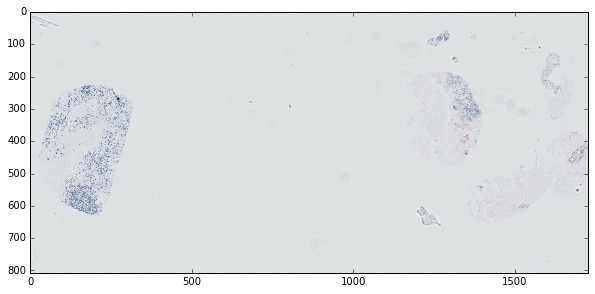

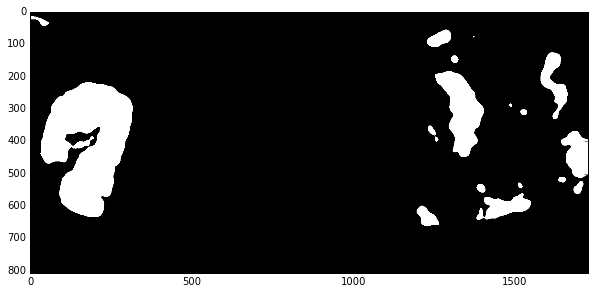

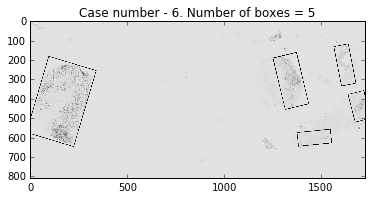

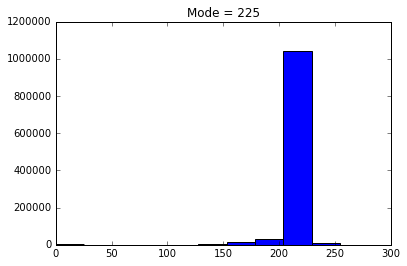

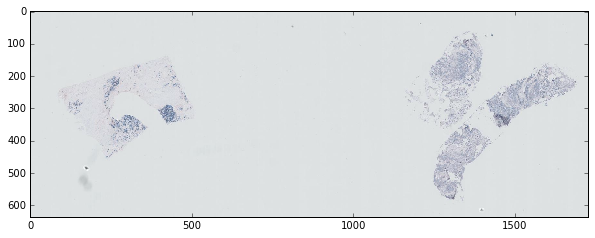

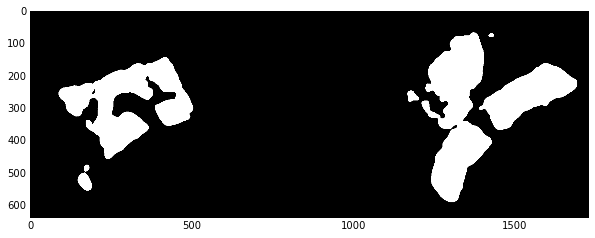

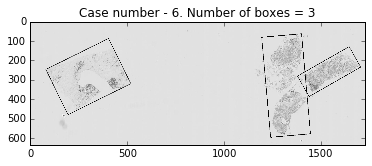

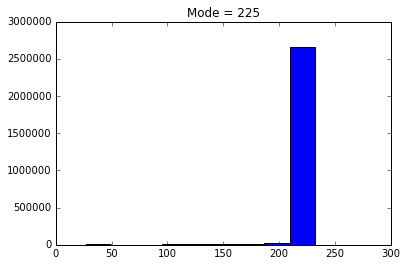

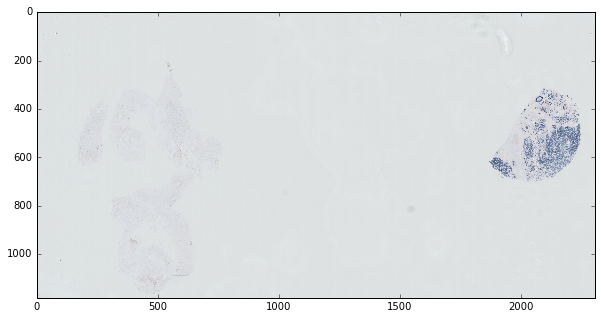

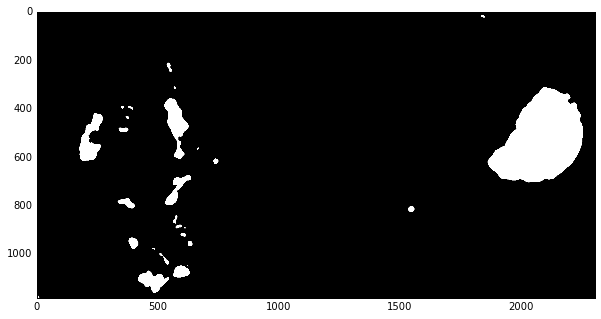

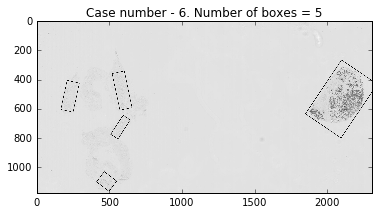

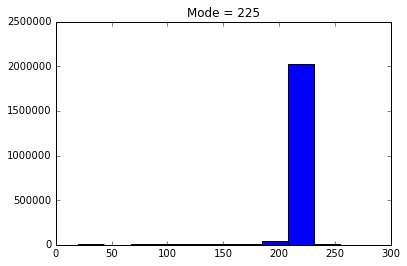

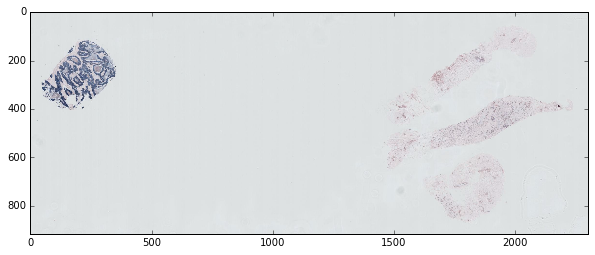

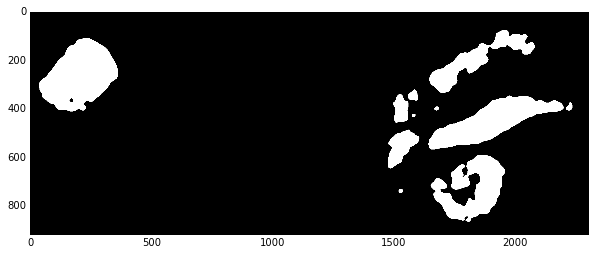

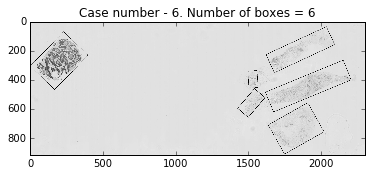

In [82]:
modes = []
for i in her2:
    caseNo = int(re.findall(r"[0-9]+",i)[0])
    
    imgOrig = cv2.imread(i)
    
    img = cv2.imread(i,0)
    mode = mstats.mode(img,axis=None)[0]
    modes.append(mode)

    plt.hist(img.flatten())
    plt.title("Mode = %d"% mode)
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(imgOrig,cmap=cm.gray)
    plt.show()

    img1 = cv2.GaussianBlur(img,(47,47),0)
    ret,thresh = cv2.threshold(img1,226,255,1)
    plt.figure(figsize=(10,10))
    plt.imshow(thresh,cmap=cm.gray)
    plt.show()

    contours,hierarchy = cv2.findContours(thresh, 1, 2)
    #x,y,w,h = cv2.boundingRect(cnt)
    #cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)

    countBoxes = 0
    for cnt in contours:

        #cnt = contours[0]
        M = cv2.moments(cnt)

        rect = cv2.minAreaRect(cnt)
        area = reduce(mul,rect[1])
        if area > 5000:
            countBoxes += 1
            box = cv2.cv.BoxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img,[box],0,(0,255,255),2)
            plt.imshow(img,cmap=cm.gray)

    plt.title("Case number - %d. Number of boxes = %d" % (obs,countBoxes))
    plt.show()